# EDA & Data Preprocessing

## Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base_path = '../data/raw/rossmann-store-sales'
train_path = os.path.join(base_path, 'train.csv')
test_path = os.path.join(base_path, 'test.csv')
store_path = os.path.join(base_path, 'store.csv')

if os.path.exists(train_path) and os.path.exists(test_path) and os.path.exists(store_path):
	rossman_df_train = pd.read_csv(train_path)
	rossman_df_test = pd.read_csv(test_path)
	rossman_df_store = pd.read_csv(store_path)
else:
	print("One or more files do not exist. Please check the file paths.")

/var/folders/mk/cbhsfqwx6f33ymf595b79hzh0000gn/T/ipykernel_33337/3736215931.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df_train = pd.read_csv(train_path)


In [3]:
online_retail_df_year1 = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name='Year 2009-2010')    # Year 2009-2010
online_retail_df_year2 = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name='Year 2010-2011')    # Year 2010-2011

## Exploratory Data Analysis
### Rossman Store Sales

In [4]:
rossman_df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
rossman_df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
print(f"rossman_df_train shape: {rossman_df_train.shape}")
print(f'rossman_df_test shape: {rossman_df_test.shape}')
print(f"rossman_df_store shape: {rossman_df_store.shape}")

rossman_df_train shape: (1017209, 9)
rossman_df_test shape: (41088, 8)
rossman_df_store shape: (1115, 10)


In [7]:
rossman_df_train.info()
rossman_df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
rossman_df_test.info()
rossman_df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [9]:
rossman_df_store.info()
rossman_df_store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [10]:
print('rossman_df_train unique values:')
print(rossman_df_train.nunique().sort_values(ascending=False))
print('rossman_df_test unique values:')
print(rossman_df_test.nunique().sort_values(ascending=False))
print('rossman_df_store unique values:')
print(rossman_df_store.nunique().sort_values(ascending=False))

rossman_df_train unique values:
Sales            21734
Customers         4086
Store             1115
Date               942
DayOfWeek            7
StateHoliday         5
Open                 2
Promo                2
SchoolHoliday        2
dtype: int64
rossman_df_test unique values:
Id               41088
Store              856
Date                48
DayOfWeek            7
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64
rossman_df_store unique values:
Store                        1115
CompetitionDistance           654
Promo2SinceWeek                24
CompetitionOpenSinceYear       23
CompetitionOpenSinceMonth      12
Promo2SinceYear                 7
StoreType                       4
Assortment                      3
PromoInterval                   3
Promo2                          2
dtype: int64


### Online Retail II

In [11]:
online_retail_df_year1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
online_retail_df_year2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
print(f"online_retail_df_year1 shape: {online_retail_df_year1.shape}")
print(f"online_retail_df_year2 shape: {online_retail_df_year2.shape}")

online_retail_df_year1 shape: (525461, 8)
online_retail_df_year2 shape: (541910, 8)


In [14]:
online_retail_df_year1.info()
online_retail_df_year1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [15]:
online_retail_df_year2.info()
online_retail_df_year2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [16]:
print('online_retail_df_year1 unique values:')
print(online_retail_df_year1.nunique().sort_values(ascending=False))
print('online_retail_df_year2 unique values:')
print(online_retail_df_year2.nunique().sort_values(ascending=False))

online_retail_df_year1 unique values:
Invoice        28816
InvoiceDate    25296
Description     4681
StockCode       4632
Customer ID     4383
Price           1606
Quantity         825
Country           40
dtype: int64
online_retail_df_year2 unique values:
Invoice        25900
InvoiceDate    23260
Customer ID     4372
Description     4223
StockCode       4070
Price           1630
Quantity         722
Country           38
dtype: int64


## Data Cleaning
### Rossman Store Sales

In [17]:
# Check for missing values
missing_values_train = rossman_df_train.isnull().sum()
missing_values_test = rossman_df_test.isnull().sum()
missing_values_store = rossman_df_store.isnull().sum()

print("Missing values in train data:\n", missing_values_train[missing_values_train > 0])
print("Missing values in test data:\n", missing_values_test[missing_values_test > 0])
print("Missing values in store data:\n", missing_values_store[missing_values_store > 0])

Missing values in train data:
 Series([], dtype: int64)
Missing values in test data:
 Open    11
dtype: int64
Missing values in store data:
 CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


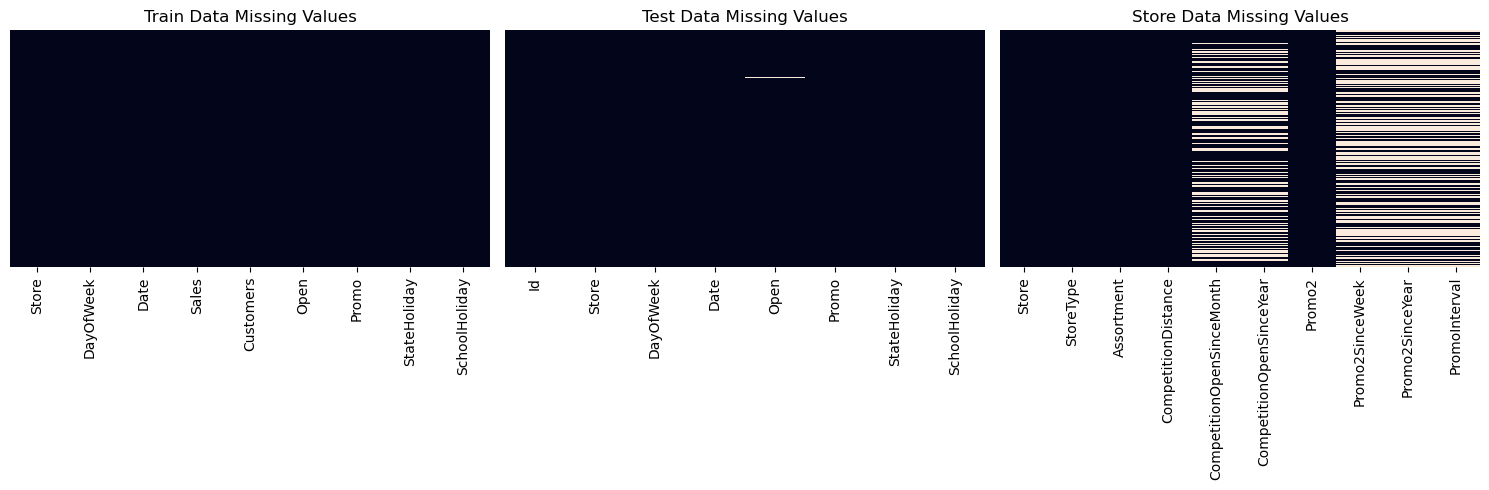

In [18]:
# Visualizing missing values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(rossman_df_train.isnull(), cbar=False, ax=ax[0], yticklabels=False)
sns.heatmap(rossman_df_test.isnull(), cbar=False, ax=ax[1], yticklabels=False)
sns.heatmap(rossman_df_store.isnull(), cbar=False, ax=ax[2], yticklabels=False)
ax[0].set_title('Train Data Missing Values')
ax[1].set_title('Test Data Missing Values')
ax[2].set_title('Store Data Missing Values')
plt.tight_layout()

In [ ]:
# Replacing missing values in test data 'Open' column with 0
rossman_df_test['Open'] = rossman_df_test['Open'].fillna(0)

In [ ]:
# For CompetitionDistance (just a few missing values)
rossman_df_store['CompetitionDistance'] = rossman_df_store['CompetitionDistance'].fillna(rossman_df_store['CompetitionDistance'].median())

# For Competition date variables - assuming no competition when missing
rossman_df_store['HasCompetition'] = rossman_df_store['CompetitionOpenSinceMonth'].notna().astype(int)

# Filling missing values with reasonable defaults
max_year = rossman_df_store['CompetitionOpenSinceYear'].max()
rossman_df_store['CompetitionOpenSinceYear'] = rossman_df_store['CompetitionOpenSinceYear'].fillna(max_year + 1)
rossman_df_store['CompetitionOpenSinceMonth'] = rossman_df_store['CompetitionOpenSinceMonth'].fillna(1)

# For Promo2 variables - no need to fill these, but we could create derived features
# These are structurally missing - only stores participating in Promo2 have these values
rossman_df_store['PromoInterval'] = rossman_df_store['PromoInterval'].fillna('None')
rossman_df_store['Promo2SinceWeek'] = rossman_df_store['Promo2SinceWeek'].fillna(0)
rossman_df_store['Promo2SinceYear'] = rossman_df_store['Promo2SinceYear'].fillna(0)